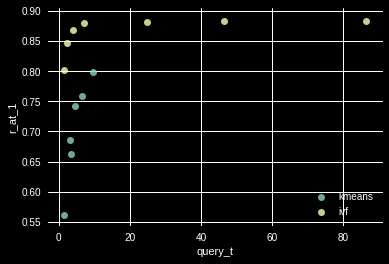

In [28]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('dark_background')


data = """quant 64 10 0 0.1440 0.1440 0.1440 0.000 8.529 2081.732 2059752
quant 64 20 0 0.2332 0.2332 0.2332 0.000 13.626 2146.871 2059608
ivf 16 0 0 0.8017 0.8978 0.8983 36.180 33.671 1.441 1286676
ivf 32 0 0 0.8467 0.9548 0.9553 37.421 36.406 2.292 1287004
ivf 64 0 0 0.8687 0.9833 0.9838 37.657 35.975 3.861 1291076
ivf 128 0 0 0.8794 0.9951 0.9956 36.595 36.125 7.186 1301372
ivf 512 0 0 0.8819 0.9994 0.9999 37.278 34.763 24.905 1345712
ivf 1024 0 0 0.8822 0.9995 1.0000 36.611 35.663 46.533 1406904
ivf 2048 0 0 0.8822 0.9995 1.0000 36.327 36.562 86.615 1526040
kmeans 3 2 10 0.6628 0.6628 0.6628 0.000 2592.504 3.332 1637364
kmeans 3 2 20 0.7582 0.7582 0.7582 0.000 2586.625 6.501 1637852
kmeans 3 2 30 0.7977 0.7977 0.7977 0.000 2617.453 9.659 1637688
kmeans 3 3 10 0.5611 0.5611 0.5611 0.000 8436.475 1.585 1658240
kmeans 3 3 20 0.6859 0.6859 0.6859 0.000 8453.122 3.046 1657824
kmeans 3 3 30 0.7428 0.7428 0.7428 0.000 8462.808 4.534 1657988"""

colnames = ['name', 'arg_1', 'arg_2', 'arg_3', 'r_at_1', 'r_at_10', 'r_at_100', 'train_t', 'add_t', 'query_t', 'mem']


data = data.split("\n")
data = [row.split() for row in data]
data = zip(*data)
data = {colname: col for colname, col in zip(colnames, data)}

df = pd.DataFrame(data)
df[colnames[1:]] = df[colnames[1:]].astype('float32')

res_key = 'kmeans'
dfs = df.where(df.name == res_key)
ax = sns.regplot(dfs.query_t, dfs.r_at_1, fit_reg=False, label='kmeans')

res_key = 'ivf'
dfs = df.where(df.name == res_key)
sns.regplot(dfs.query_t, dfs.r_at_1, fit_reg=False, ax=ax)

plt.legend(['kmeans', 'ivf'])